In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, '$\\epsilon$(x) vs x')

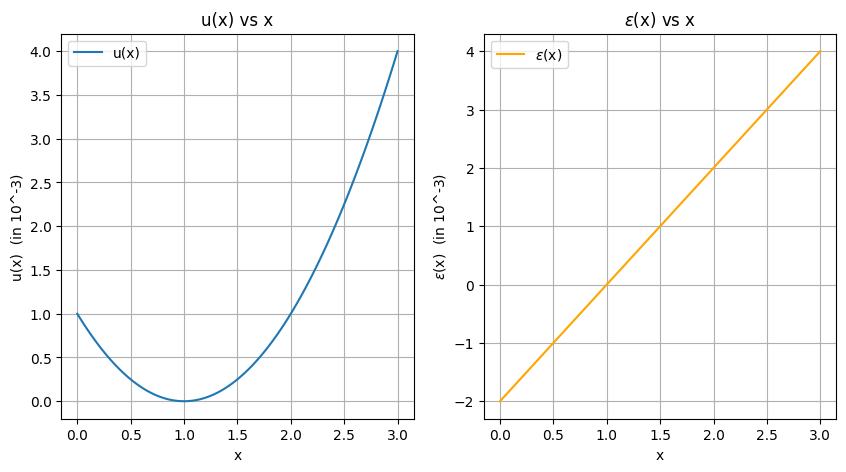

In [4]:
n = 100
x = np.linspace(0, 3, n)
# u_x = (x-1)^2, e_x = 2(x-1), plote_x, u_x
# u_x = (x-1)**2*(10**(-3))
# e_x = 2*(x-1)*(10**(-3))
c = 10**(-3)
u_x = (x-1)**2
e_x = 2*(x-1)

# two plots using subplot, left and right
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, u_x, label='u(x)')
plt.xlabel('x')
plt.ylabel('u(x)  (in 10^-3)')
plt.legend()
plt.grid()
plt.title('u(x) vs x')

plt.subplot(1, 2, 2)
plt.plot(x, e_x, label='$\epsilon$(x)', c='orange')
plt.xlabel('x')
plt.ylabel('$\epsilon$(x)  (in 10^-3)')
plt.legend()
plt.grid()
plt.title('$\epsilon$(x) vs x')




In [8]:
from sympy import symbols, simplify, prod

# Define the variable and nodal positions
x = symbols('x')
node_positions = [2, 3, 4, 5, 6]

# Function to calculate Lagrange basis polynomial for node i
def lagrange_basis(i, node_positions):
    x_i = node_positions[i]
    basis = prod([(x - node_positions[j]) / (x_i - node_positions[j]) 
                  for j in range(len(node_positions)) if j != i])
    return simplify(basis)

# Calculate shape functions for each node
shape_functions = [lagrange_basis(i, node_positions) for i in range(5)]

# Substitute x = 3.5 to find the shape function values at that point
x_value = 3.5
shape_values = [sf.subs(x, x_value) for sf in shape_functions]

shape_values
t = np.array([3.0, 1.0, 0.0, -1.0, 2.0])

print(np.sum(t*shape_values))


0.554687500000000


In [2]:
import numpy as np
from scipy.integrate import quad
from numpy.polynomial.legendre import leggauss

# Define the functions to integrate
def func_a(x):
    return x**2 + 1

def func_b(z):
    return z**4 + 2*z**2

def func_c(z):
    return z /  (z**2 + 1)

def func_d(z):
    return np.cos(np.pi * z)**2

def func_e(z):
    return 3*z**3 + 2

# Analytical integration using scipy's quad
integral_a, _ = quad(func_a, 0, 4)
integral_b, _ = quad(func_b, -1, 1)
integral_c, _ = quad(func_c, -1, 1)
integral_d, _ = quad(func_d, -1, 1)
integral_e, _ = quad(func_e, -1, 1)

# Function to perform Gauss quadrature
def gauss_quadrature(func, a, b, n):
    # Get the Gauss-Legendre points and weights
    points, weights = leggauss(n)
    
    # Perform change of interval [a, b] -> [-1, 1]
    transformed_points = 0.5 * (points + 1) * (b - a) + a
    transformed_weights = 0.5 * (b - a) * weights
    
    # Compute the integral using the transformed points and weights
    integral = np.sum(transformed_weights * func(transformed_points))
    
    return integral

# Gauss quadrature integration for all cases
n_points = 2 # Using 4 points for Gauss quadrature

gauss_a = gauss_quadrature(func_a, 0, 4, n_points)
gauss_b = gauss_quadrature(func_b, -1, 1, n_points)
gauss_c = gauss_quadrature(func_c, -1, 1, n_points)
gauss_d = gauss_quadrature(func_d, -1, 1, n_points)
gauss_e = gauss_quadrature(func_e, -1, 1, n_points)

integral_a, gauss_a, integral_b, gauss_b, integral_c, gauss_c, integral_d, gauss_d, integral_e, gauss_e


(25.333333333333336,
 25.333333333333336,
 1.7333333333333334,
 1.5555555555555554,
 0.0,
 0.0,
 0.9999999999999998,
 0.11579453905905365,
 4.0,
 4.0)

In [3]:
# define functions
def q3_a(x):
    return x**2 + 1

def q3_b(x):
    return x**4 + 2*x**2

def q3_c(x):
    return x/(x**2 + 1)

def q3_d(x):
    return np.cos(np.pi*x)**2

def q3_e(x):
    return 3*x**3 + 2

def gauss_quad_integral(func, a, b, n):
    # Get the Gauss-Legendre points and weights
    points, weights = leggauss(n)
    
    # Perform change of interval [a, b] -> [-1, 1]
    transformed_points = 0.5 * (points + 1) * (b - a) + a
    transformed_weights = 0.5 * (b - a) * weights
    
    # Compute the integral using the transformed points and weights
    integral = np.sum(transformed_weights * func(transformed_points))
    
    return integral

# Gauss quadrature integration for all cases
r = 2
print(f"q3_a: using {r} points")
print("Gauss quadrature integral: ", gauss_quad_integral(q3_a, 0, 4, r))

r = 3
print(f"q3_b: using {r} points")
print("Gauss quadrature integral: ", gauss_quad_integral(q3_b, -1, 1, r))

r = 2
print(f"q3_c: using {r} points")
print("Gauss quadrature integral: ", gauss_quad_integral(q3_c, -1, 1, r))

r = 5
print(f"q3_d: using {r} points")
print("Gauss quadrature integral: ", gauss_quad_integral(q3_d, -1, 1, r))

r = 2
print(f"q3_e: using {r} points")
print("Gauss quadrature integral: ", gauss_quad_integral(q3_e, -1, 1, r))

q3_a: using 2 points
Gauss quadrature integral:  25.333333333333336
q3_b: using 3 points
Gauss quadrature integral:  1.733333333333334
q3_c: using 2 points
Gauss quadrature integral:  0.0
q3_d: using 5 points
Gauss quadrature integral:  1.0166689120408172
q3_e: using 2 points
Gauss quadrature integral:  4.0
